In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import torch
import torch.optim as optim
import torch.nn as nn
from collections import OrderedDict
import warnings
warnings.filterwarnings('ignore') 
%matplotlib inline

# Homework 5 Question 3: Neural Network


In [2]:
housing = pd.read_csv('Housing.csv')
vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
data = housing[vars]
data.head()

,area,bedrooms,bathrooms,stories,parking,price
0,7420,4,2,3,2,13300000
1,8960,4,4,4,3,12250000
2,9960,3,2,2,2,12250000
3,7500,4,2,2,3,12215000
4,7420,4,1,2,2,11410000


In [3]:
data_scaled = StandardScaler()
data_scaled = data_scaled.fit_transform(data.values[:,:])
data_scaled = pd.DataFrame(data_scaled)
data_scaled.head()

,0,1,2,3,4,5
0,1.046726,1.403419,1.421812,1.378217,1.517692,4.566365
1,1.757010,1.403419,5.405809,2.532024,2.679409,4.004484
2,2.218232,0.047278,1.421812,0.224410,1.517692,4.004484
3,1.083624,1.403419,1.421812,0.224410,2.679409,3.985755
4,1.046726,1.403419,-0.570187,0.224410,1.517692,3.554979


In [4]:
y = data_scaled.values[:,5]
x = data_scaled.values[:,0:5]
x

array([[ 1.04672629,  1.40341936,  1.42181174,  1.37821692,  1.51769249],
       [ 1.75700953,  1.40341936,  5.40580863,  2.53202371,  2.67940935],
       [ 2.21823241,  0.04727831,  1.42181174,  0.22441013,  1.51769249],
       ...,
       [-0.70592066, -1.30886273, -0.57018671, -0.92939666, -0.80574124],
       [-1.03338891,  0.04727831, -0.57018671, -0.92939666, -0.80574124],
       [-0.5998394 ,  0.04727831, -0.57018671,  0.22441013, -0.80574124]])

In [5]:
# Converting data from array to tensors
x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)
x

tensor([[ 1.0467,  1.4034,  1.4218,  1.3782,  1.5177],
        [ 1.7570,  1.4034,  5.4058,  2.5320,  2.6794],
        [ 2.2182,  0.0473,  1.4218,  0.2244,  1.5177],
        ...,
        [-0.7059, -1.3089, -0.5702, -0.9294, -0.8057],
        [-1.0334,  0.0473, -0.5702, -0.9294, -0.8057],
        [-0.5998,  0.0473, -0.5702,  0.2244, -0.8057]])

In [6]:
# Splitting data into 20% testing and 80% training
xTrain, xVal, yTrain, yVal = train_test_split(x, y, test_size=0.2, random_state = 0)
print(xTrain.shape, xVal.shape, yTrain.shape, yVal.shape)

torch.Size([436, 5]) torch.Size([109, 5]) torch.Size([436]) torch.Size([109])


In [7]:
# Setting Variables for testing data and validation data
# Training Data
areaTrain = xTrain[:,0]
bedTrain = xTrain[:,1]
bathTrain = xTrain[:,2]
storiesTrain = xTrain[:,3]
parkingTrain = xTrain[:,4]
priceTrain = yTrain

# Testing/ Validation Data
areaTest = xVal[:,0]
bedTest = xVal[:,1]
bathTest = xVal[:,2]
storiesTest = xVal[:,3]
parkingTest = xVal[:,4]
priceTest = yVal

In [8]:
# Functions
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

def training_loop (n_epochs, optimizer, model, loss_fn, xTrain, xVal, yTrain, yVal, e, lossTrain, lossVal):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(xTrain)
        loss_train = loss_fn(t_p_train, yTrain)
        
        t_p_val = model(xVal)
        loss_val = loss_fn(t_p_val, yVal)

        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        e.append(epoch)
        lossTrain.append(loss_train.item())
       
        lossVal.append(loss_val.item())
        
        if epoch == 1 or epoch % 10 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val:.4f}")


# Creating Neural Network with 1 hidden layer

In [9]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(5, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=5, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [10]:
epoch_1 = []
lossTrain_1 = []
lossVal_1 = []
optimizer = optim.SGD(seq_model.parameters(), lr=.03)
pareter1 = training_loop(n_epochs = 200, 
              optimizer = optimizer, 
              model = seq_model,
              loss_fn = loss_fn, 
              xTrain = xTrain, 
              xVal = xVal, 
              yTrain = yTrain, 
              yVal = yVal, 
              e = epoch_1, 
              lossTrain = lossTrain_1, 
              lossVal = lossVal_1)

Epoch 1, Training loss 1.1640, Validation loss 0.9058
Epoch 10, Training loss 1.0875, Validation loss 0.8546
Epoch 20, Training loss 1.0620, Validation loss 0.8391
Epoch 30, Training loss 1.0530, Validation loss 0.8338
Epoch 40, Training loss 1.0493, Validation loss 0.8316
Epoch 50, Training loss 1.0475, Validation loss 0.8304
Epoch 60, Training loss 1.0466, Validation loss 0.8296
Epoch 70, Training loss 1.0460, Validation loss 0.8291
Epoch 80, Training loss 1.0455, Validation loss 0.8287
Epoch 90, Training loss 1.0452, Validation loss 0.8284
Epoch 100, Training loss 1.0450, Validation loss 0.8281
Epoch 110, Training loss 1.0449, Validation loss 0.8279
Epoch 120, Training loss 1.0447, Validation loss 0.8277
Epoch 130, Training loss 1.0446, Validation loss 0.8276
Epoch 140, Training loss 1.0445, Validation loss 0.8275
Epoch 150, Training loss 1.0445, Validation loss 0.8274
Epoch 160, Training loss 1.0444, Validation loss 0.8273
Epoch 170, Training loss 1.0444, Validation loss 0.8273
Epo

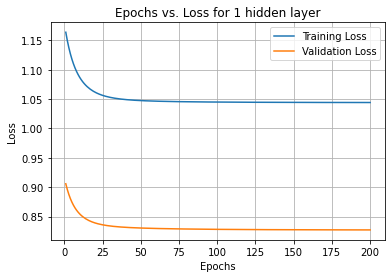

In [11]:
plt.plot(epoch_1, lossTrain_1, label = "Training Loss")
plt.plot(epoch_1, lossVal_1, label = "Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epochs vs. Loss for 1 hidden layer")
plt.legend()
plt.grid()
plt.show()

# Creating Neural Network with 3 hidden layer

In [12]:
seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear_1', nn.Linear(5, 8)),
    ('hidden_activation_1', nn.ReLU()),
    ('hidden_linear_2', nn.Linear(8, 8)),
    ('hidden_activation_2', nn.ReLU()),
    ('hidden_linear_3', nn.Linear(8, 8)),
    ('hidden_activation_3', nn.ReLU()),
    ('output_linear', nn.Linear(8, 1))
]))

In [13]:
epoch_3 = []
lossTrain_3 = []
lossVal_3 = []
optimizer = optim.SGD(seq_model.parameters(), lr=0.05)
pareter3 = training_loop(n_epochs = 200, 
              optimizer = optimizer, 
              model = seq_model,
              loss_fn = loss_fn, 
              xTrain = xTrain, 
              xVal = xVal, 
              yTrain = yTrain, 
              yVal = yVal, 
              e = epoch_3, 
              lossTrain = lossTrain_3, 
              lossVal = lossVal_3)

Epoch 1, Training loss 1.0976, Validation loss 0.8933
Epoch 10, Training loss 1.0502, Validation loss 0.8372
Epoch 20, Training loss 1.0444, Validation loss 0.8283
Epoch 30, Training loss 1.0439, Validation loss 0.8267
Epoch 40, Training loss 1.0438, Validation loss 0.8264
Epoch 50, Training loss 1.0438, Validation loss 0.8263
Epoch 60, Training loss 1.0438, Validation loss 0.8262
Epoch 70, Training loss 1.0438, Validation loss 0.8262
Epoch 80, Training loss 1.0438, Validation loss 0.8262
Epoch 90, Training loss 1.0438, Validation loss 0.8262
Epoch 100, Training loss 1.0437, Validation loss 0.8262
Epoch 110, Training loss 1.0437, Validation loss 0.8262
Epoch 120, Training loss 1.0437, Validation loss 0.8262
Epoch 130, Training loss 1.0437, Validation loss 0.8261
Epoch 140, Training loss 1.0437, Validation loss 0.8261
Epoch 150, Training loss 1.0437, Validation loss 0.8261
Epoch 160, Training loss 1.0437, Validation loss 0.8261
Epoch 170, Training loss 1.0437, Validation loss 0.8261
Epo

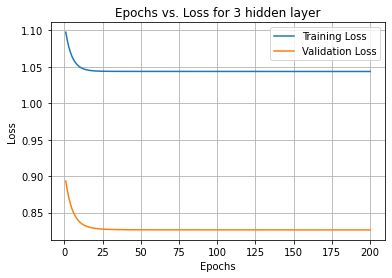

In [14]:
plt.plot(epoch_3, lossTrain_3, label = "Training Loss")
plt.plot(epoch_3, lossVal_3, label = "Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epochs vs. Loss for 3 hidden layer")
plt.legend()
plt.grid()
plt.show()